In [12]:
from sklearn import neighbors
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import time
import numpy as np
from matplotlib.patches import Circle


In [39]:
import numpy as np
rng = np.random.RandomState(0)
X = rng.random_sample((100, 2))  # 10 points in 3 dimensions
print(X)
len(X)

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]
 [0.79172504 0.52889492]
 [0.56804456 0.92559664]
 [0.07103606 0.0871293 ]
 [0.0202184  0.83261985]
 [0.77815675 0.87001215]
 [0.97861834 0.79915856]
 [0.46147936 0.78052918]
 [0.11827443 0.63992102]
 [0.14335329 0.94466892]
 [0.52184832 0.41466194]
 [0.26455561 0.77423369]
 [0.45615033 0.56843395]
 [0.0187898  0.6176355 ]
 [0.61209572 0.616934  ]
 [0.94374808 0.6818203 ]
 [0.3595079  0.43703195]
 [0.6976312  0.06022547]
 [0.66676672 0.67063787]
 [0.21038256 0.1289263 ]
 [0.31542835 0.36371077]
 [0.57019677 0.43860151]
 [0.98837384 0.10204481]
 [0.20887676 0.16130952]
 [0.65310833 0.2532916 ]
 [0.46631077 0.24442559]
 [0.15896958 0.11037514]
 [0.65632959 0.13818295]
 [0.19658236 0.36872517]
 [0.82099323 0.09710128]
 [0.83794491 0.09609841]
 [0.97645947 0.4686512 ]
 [0.97676109 0.60484552]
 [0.73926358 0.03918779]
 [0.28280696 0.12019656]
 [0.2961402  0.11872772]


100

In [76]:
leaf_size=5
tree = neighbors.BallTree(X, leaf_size=10)              
dist, ind = tree.query(X[:2], k=10)#k indicates how many neighbors you want to find                
print(ind)  # indices of 3 closest neighbors computing the distance (euclidian)

print(dist)  # distances to 3 closest neighbors

[[ 0 68 11 18 93 22 67  2 53 62]
 [ 1 53 67 18 93 25 68 65 69 60]]
[[0.         0.06703304 0.10907128 0.11687068 0.12597086 0.12608646
  0.12610313 0.14306129 0.14933122 0.16568409]
 [0.         0.02939382 0.056487   0.07265268 0.0808327  0.11115924
  0.11198856 0.1171119  0.12372823 0.13000535]]


In [87]:
A = neighbors.kneighbors_graph(tree,n_neighbors = 10,mode='distance',include_self=False)
#plt.plot(A)
A.toarray()

array([[0.        , 0.        , 0.14306129, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14306129, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.14721688, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24721062,
        0.        ]])

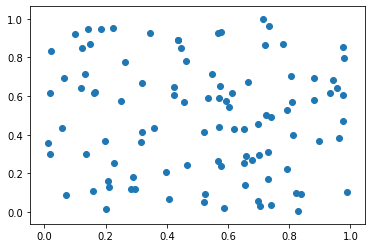

In [74]:
plt.scatter(X[:,0],X[:,1])

average   [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1]
complete   [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1]
ward   [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1]
single   [0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1]


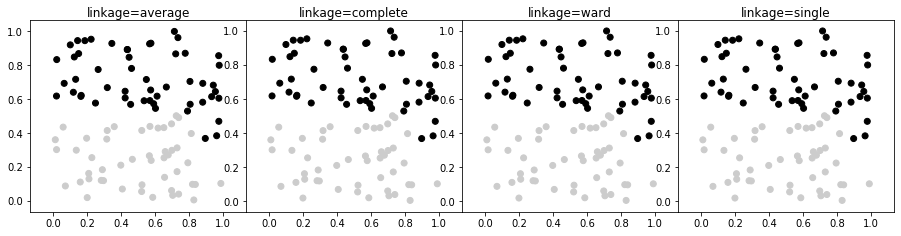

In [91]:
#n_clusters = 5
plt.figure(figsize=(12, 3))
for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
        # ward : minimizes the variance of the clusters being merged.
        # average : uses the average of the distances of each observation of the two sets.
        # complete : or maximum linkage uses the maximum distances between all observations of the two sets.
        # single : uses the minimum of the distances between all observations of the two sets.
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(connectivity=A,compute_full_tree=True)#,linkage=linkage,
                                           # n_clusters=n_clusters)
                
           
            model.fit(X)
            print(linkage,' ',model.labels_)
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s' % (linkage),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            #plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            #plt.suptitle('n_cluster=%i, connectivity=%r' %
             #            (n_clusters, connectivity is not None), size=17)


plt.show()


In [97]:
import itertools

model = AgglomerativeClustering(connectivity=A)
tree.fit(X)


#ii = itertools.count(X.shape[0])
#[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in model.children_]

ii = itertools.count(tree[2])
[{'node_id': next(ii), 'left': x[0], 'right':x[1]} for x in tree[0]]

AttributeError: 'sklearn.neighbors.ball_tree.BallTree' object has no attribute 'fit'

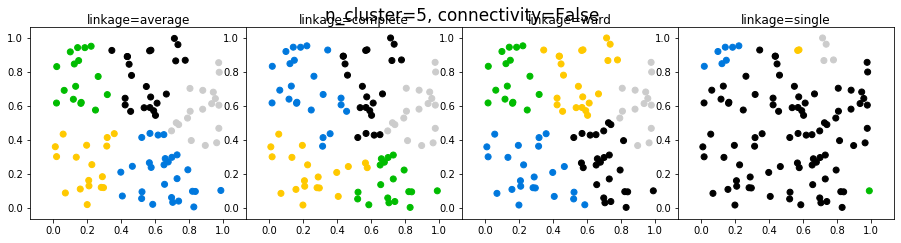

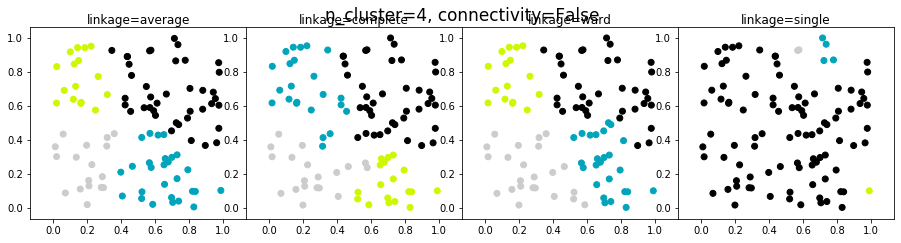

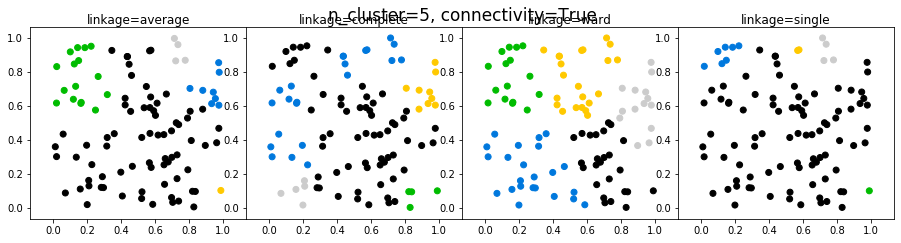

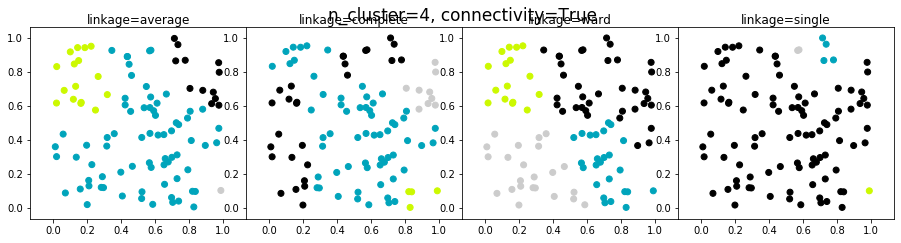

In [45]:
for connectivity in (None, A):
    for n_clusters in (5, 4):
        plt.figure(figsize=(12, 3))
        for index, linkage in enumerate(('average',
                                         'complete',
                                         'ward',
                                         'single')):
        # ward : minimizes the variance of the clusters being merged.
        # average : uses the average of the distances of each observation of the two sets.
        # complete : or maximum linkage uses the maximum distances between all observations of the two sets.
        # single : uses the minimum of the distances between all observations of the two sets.
            plt.subplot(1, 4, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            connectivity=connectivity,
                                            n_clusters=n_clusters)
           
            model.fit(X)
            
            plt.scatter(X[:, 0], X[:, 1], c=model.labels_,
                        cmap=plt.cm.nipy_spectral)
            plt.title('linkage=%s' % (linkage),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            #plt.axis('off')

            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)


plt.show()

In [11]:
print(tree.query(X[:1], k=3)  )
X[:1]

(array([[0.        , 0.19662693, 0.29473397]]), array([[0, 3, 1]], dtype=int64))


array([[0.5488135 , 0.71518937, 0.60276338]])

In [1]:
tree = neighbors.BallTree(X, leaf_size=2)              
dist, ind = tree.query(X[:1], k=2) 

print(dist)
print(ind)
#plot(tree)

NameError: name 'neighbors' is not defined

In [102]:
np.mean(([1,2,3],[2,2,2]),axis=0)

array([1.5, 2. , 2.5])

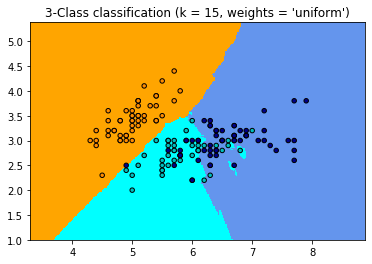

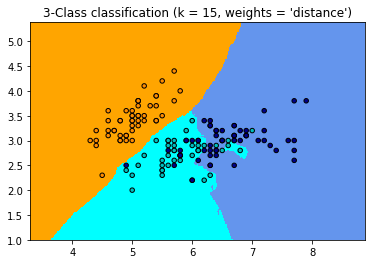

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()
print(X)
print(y)